In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import to_networkx_graph

In [3]:
countries=gpd.read_file('NUTS_LB_2016_4326_LEVL_3.shp')

In [8]:
#DE211 : Inglostadt, DE212 :Muenchen, De222: Passau, DE232: Rsegensburg, DE252: Erlangen, DE 21M: Traunstein
# AT 312: Linz, AT13: Wien, AT 221: Graz
countries = countries.sort_values(by=['NUTS_ID'])
paisi = countries[countries.NUTS_ID=='AL011']
paisi.geometry

222    POINT (20.4035 42.0651)
Name: geometry, dtype: object

DE232
DE222
DE212
DE252
DE21M
AT13


/home/saif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


TypeError: unhashable type: 'dict'

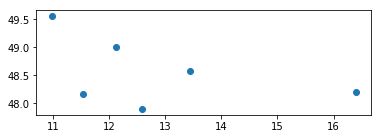

In [37]:
nodes=['DE232','DE222', 'DE212', 'DE252', 'DE21M', 'AT13']
graph_df=pd.DataFrame()

for code in nodes:
    print(code)
    _df=(countries.ix[countries['FID'].str.contains(str(code))])
    #print(_df['geometry'])
    graph_df=graph_df.append(_df)
graph_df=pd.concat([graph_df,graph_df.T]).fillna(0)
#print(graph_df)
#graph_df.head()
graph=graph_df.drop(columns=['NUTS_ID','LEVL_CODE','FID','CNTR_CODE','NUTS_NAME'])
graph.plot()
g=nx.Graph()
g.add_nodes_from(graph)
#nx.draw(g)
graph = nx.convert_matrix.from_pandas_edgelist(graph, dict(enumerate(graph.columns)))

In [6]:
nx.Graph.add_nodes_from?

In [72]:
nx.spring_layout(g , k =2)

{'geometry': array([0.94762474, 0.40126507]),
 462: array([-0.55973665,  0.85050022]),
 450: array([-0.8909287 ,  0.08239737]),
 427: array([0.29187315, 0.94958841]),
 485: array([-0.73719198, -0.73620066]),
 447: array([ 0.85526171, -0.54755042]),
 244: array([ 0.09309772, -1.        ])}

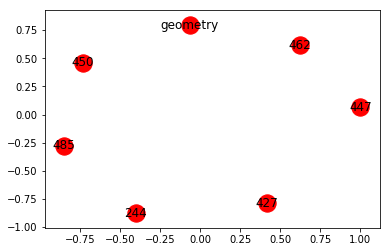

In [73]:
nx.draw_networkx(g)
#plt.show()

In [8]:
for i in g:
    print(i)

geometry
462
450
427
485
447
244


In [5]:
#countries['FID'].dtype

In [6]:
Grp = nx.read_shp('NUTS_LB_2016_4326_LEVL_3.shp')
len(Grp.nodes())
Grp.nodes(data=True)


NodeDataView({(6.641, 50.5382): {'NUTS_ID': 'DEA28', 'LEVL_CODE': 3, 'CNTR_CODE': 'DE', 'NUTS_NAME': 'Euskirchen', 'FID': 'DEA28', 'ShpName': 'NUTS_LB_2016_4326_LEVL_3'}, (6.1717, 51.0525): {'NUTS_ID': 'DEA29', 'LEVL_CODE': 3, 'CNTR_CODE': 'DE', 'NUTS_NAME': 'Heinsberg', 'FID': 'DEA29', 'ShpName': 'NUTS_LB_2016_4326_LEVL_3'}, (7.5224, 51.0215): {'NUTS_ID': 'DEA2A', 'LEVL_CODE': 3, 'CNTR_CODE': 'DE', 'NUTS_NAME': 'Oberbergischer Kreis', 'FID': 'DEA2A', 'ShpName': 'NUTS_LB_2016_4326_LEVL_3'}, (7.1917, 51.022): {'NUTS_ID': 'DEA2B', 'LEVL_CODE': 3, 'CNTR_CODE': 'DE', 'NUTS_NAME': 'Rheinisch-Bergischer Kreis', 'FID': 'DEA2B', 'ShpName': 'NUTS_LB_2016_4326_LEVL_3'}, (7.2626, 50.7726): {'NUTS_ID': 'DEA2C', 'LEVL_CODE': 3, 'CNTR_CODE': 'DE', 'NUTS_NAME': 'Rhein-Sieg-Kreis', 'FID': 'DEA2C', 'ShpName': 'NUTS_LB_2016_4326_LEVL_3'}, (6.2155, 50.7581): {'NUTS_ID': 'DEA2D', 'LEVL_CODE': 3, 'CNTR_CODE': 'DE', 'NUTS_NAME': 'Städteregion Aachen', 'FID': 'DEA2D', 'ShpName': 'NUTS_LB_2016_4326_LEVL_3'}, 

In [66]:
nx.spring_layout(Grp)

{(6.641, 50.5382): array([ 0.90627033, -0.30580646]),
 (6.1717, 51.0525): array([-0.26396862,  0.92098379]),
 (7.5224, 51.0215): array([-0.42300197, -0.8748399 ]),
 (7.1917, 51.022): array([-0.7126528 ,  0.74690408]),
 (7.2626, 50.7726): array([ 0.29389682, -0.95607376]),
 (6.2155, 50.7581): array([0.6860863 , 0.54058444]),
 (6.912, 51.5631): array([-0.43716225, -0.90970498]),
 (7.0849, 51.5335): array([ 0.98312265, -0.09341095]),
 (7.6332, 51.9518): array([-0.83689535,  0.43497643]),
 (6.9093, 51.9662): array([-0.8796432 , -0.48154116]),
 (7.4136, 51.8518): array([0.75230312, 0.6453523 ]),
 (7.1595, 51.671): array([-0.99168772,  0.07354764]),
 (7.5476, 52.2058): array([0.62959921, 0.76683557]),
 (7.9518, 51.8703): array([0.69621181, 0.56876618]),
 (8.5488, 52.0166): array([-0.36361673, -0.8821547 ]),
 (8.4224, 51.8573): array([-0.1697429, -0.9393158]),
 (8.6257, 52.166): array([0.89571667, 0.44331679]),
 (9.1726, 51.6626): array([-0.2254988,  0.9804849]),
 (8.9483, 51.9838): array([ 0

In [38]:
df_csv = pd.read_csv('distances_nuts_matrix_NUTS_2016.csv')
list_cities= ['DE232','DE222', 'DE212', 'DE252', 'DE21M', 'AT130']
df = df_csv[df_csv['FROM'].isin(list_cities)]
df = df[df['TO'].isin(list_cities)]
df

FROM     TO  DISTANCE   AL      AT   BE   BA   BG   BY   CH  ...    \
31708   AT130  DE212    439.48  0.0  305.47  0.0  0.0  0.0  0.0  0.0  ...     
31728   AT130  DE21M    350.08  0.0  305.47  0.0  0.0  0.0  0.0  0.0  ...     
31731   AT130  DE222    283.43  0.0  260.83  0.0  0.0  0.0  0.0  0.0  ...     
31743   AT130  DE232    395.67  0.0  260.61  0.0  0.0  0.0  0.0  0.0  ...     
31766   AT130  DE252    510.33  0.0  260.61  0.0  0.0  0.0  0.0  0.0  ...     
428190  DE232  AT130    395.67  0.0  260.61  0.0  0.0  0.0  0.0  0.0  ...     
428373  DE232  DE212    124.10  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
428393  DE232  DE21M    237.41  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
428396  DE232  DE222    120.08  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
428430  DE232  DE252    118.37  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
459694  DE252  AT130    511.24  0.0  260.83  0.0  0.0  0.0  0.0  0.0  ...     
459877  DE252  DE212    186.81  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
459897  DE252  DE21M    299.48  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
459900  DE252  DE222    234.73  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
459912  DE252  DE232    120.50  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
544182  DE212  AT130    439.48  0.0  305.47  0.0  0.0  0.0  0.0  0.0  ...     
544384  DE212  DE21M    117.97  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
544387  DE212  DE222    190.35  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
544399  DE212  DE232    124.10  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
544422  DE212  DE252    186.17  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
555638  DE222  AT130    282.76  0.0  260.61  0.0  0.0  0.0  0.0  0.0  ...     
555821  DE222  DE212    192.29  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
555841  DE222  DE21M    115.00  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
555855  DE222  DE232    120.08  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
555878  DE222  DE252    234.73  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
564230  DE21M  AT130    350.08  0.0  305.47  0.0  0.0  0.0  0.0  0.0  ...     
564413  DE21M  DE212    117.97  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
564435  DE21M  DE222    114.66  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
564447  DE21M  DE232    237.41  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     
564470  DE21M  DE252    299.48  0.0    0.00  0.0  0.0  0.0  0.0  0.0  ...     

         RO   RS   RU   SE   SI   SK   TR   UA   UK  OTHER  
31708   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
31728   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
31731   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
31743   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
31766   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
428190  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
428373  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
428393  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
428396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
428430  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
459694  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
459877  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
459897  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
459900  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
459912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
544182  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
544384  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
544387  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
544399  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
544422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
555638  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
555821  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
555841  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
555855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
555878  0.0  0.0  0.0  0.0  0.0  0

In [39]:
G = nx.from_pandas_edgelist(df, 'FROM', 'TO', 'DISTANCE')
#G.nodes(data=True)
pos = nx.spring_layout(G)
pos.keys()
#nx.draw_networkx(Grp, pos = nx.spring_layout(Grp))
#plt.figure(figsize=(200,100))
#plt.show()

dict_keys(['AT130', 'DE212', 'DE21M', 'DE222', 'DE232', 'DE252'])

In [40]:
pos

{'AT130': array([-0.75578122, -0.72780717]),
 'DE212': array([ 0.98116837, -0.28206838]),
 'DE21M': array([0.7555512 , 0.72759208]),
 'DE222': array([-0.98085014,  0.28197207]),
 'DE232': array([ 0.25147728, -0.99968861]),
 'DE252': array([-0.25156549,  1.        ])}

    NUTS_ID  LEVL_CODE CNTR_CODE NUTS_NAME    FID                 geometry
244   AT130          3        AT      Wien  AT130  POINT (16.3932 48.2028)
    NUTS_ID  LEVL_CODE CNTR_CODE                   NUTS_NAME    FID  \
427   DE212          3        DE  MÃ¼nchen, Kreisfreie Stadt  DE212   

                    geometry  
427  POINT (11.5198 48.1637)  
    NUTS_ID  LEVL_CODE CNTR_CODE   NUTS_NAME    FID                 geometry
447   DE21M          3        DE  Traunstein  DE21M  POINT (12.5883 47.8914)
    NUTS_ID  LEVL_CODE CNTR_CODE                 NUTS_NAME    FID  \
450   DE222          3        DE  Passau, Kreisfreie Stadt  DE222   

                   geometry  
450  POINT (13.436 48.5815)  
    NUTS_ID  LEVL_CODE CNTR_CODE                     NUTS_NAME    FID  \
462   DE232          3        DE  Regensburg, Kreisfreie Stadt  DE232   

                   geometry  
462  POINT (12.1147 49.011)  
    NUTS_ID  LEVL_CODE CNTR_CODE                   NUTS_NAME    FID  \
485   DE252   

{'AT130': array([16.3932, 48.2028]),
 'DE212': array([11.5198, 48.1637]),
 'DE21M': array([12.5883, 47.8914]),
 'DE222': array([13.436 , 48.5815]),
 'DE232': array([12.1147, 49.011 ]),
 'DE252': array([10.9782, 49.5644])}

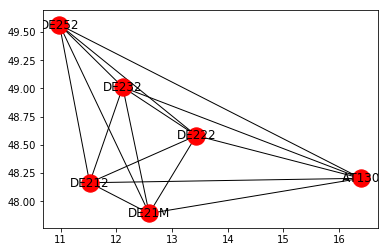

In [41]:
pos
for n in pos.keys():    
    paisi = countries[countries.NUTS_ID == n]
    print(paisi)
    pos[n][0]= paisi.geometry.x
    pos[n][1]= paisi.geometry.y
    
nx.draw_networkx(G,pos=pos, arrows=True)
pos
